# Mathematics

In [1]:
import torch
import pandas as pd
import numpy as np
import scipy.stats as stats

import sympy as sym
import sympy.plotting.plot as symplot

import plotly.graph_objects as go
from plotly.io import renderers
renderers.default = 'png'
from plotly.subplots import make_subplots

from pprint import pprint
from utils.design import plotly_main_layout, plotly_main_subplot_layout

___
### Gradient Descent 1D

1. Guess a solution;
2. Compute the error;
3. Learn from mistakes and modify the parameters.

The first step is to define the function $f(x)$ and its derivative $f(x)'$

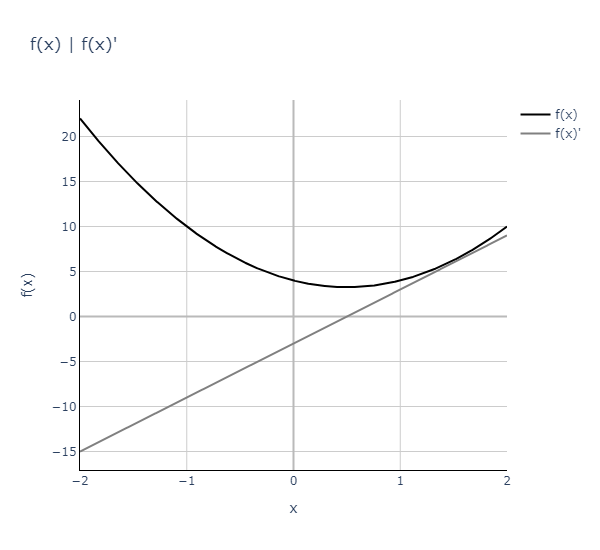

In [84]:
def fx(x):
    return 3*x**2 -3*x + 4

def deriv(x):
    return 6*x -3

# ==============================================================================

x = np.linspace(-2, 2, 2001)

fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=x, y=fx(x), marker=dict(color='black'), name="f(x)"
))
fig1.add_trace(go.Scatter(
    x=x, y=deriv(x), marker=dict(color='grey'), name="f(x)'"
))

fig1 = plotly_main_layout(fig1, title="f(x) | f(x)'", x='x', y='f(x)', width=600, height=550)
fig1.show()

Now, here is a function to evaluate the gradiente descent

In [67]:
def gradient_descent(localmin, learning_rate, training_epochs):

    grad_ = []
    localmin_ = []
    learning_rate_grad_ = []
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad

        grad_.append(grad[0])
        localmin_.append(localmin[0])
        learning_rate_grad_.append((learning_rate*grad)[0])

    df_ = pd.DataFrame({
        'Gradient': grad_,
        'Local Minimum': localmin_,
        'Learning Rate * Gradient': learning_rate_grad_
    })

    return df_

Assuming a local minimum to iterate, the learning rate and the amount of epochs, we can evaluate the algorithm.

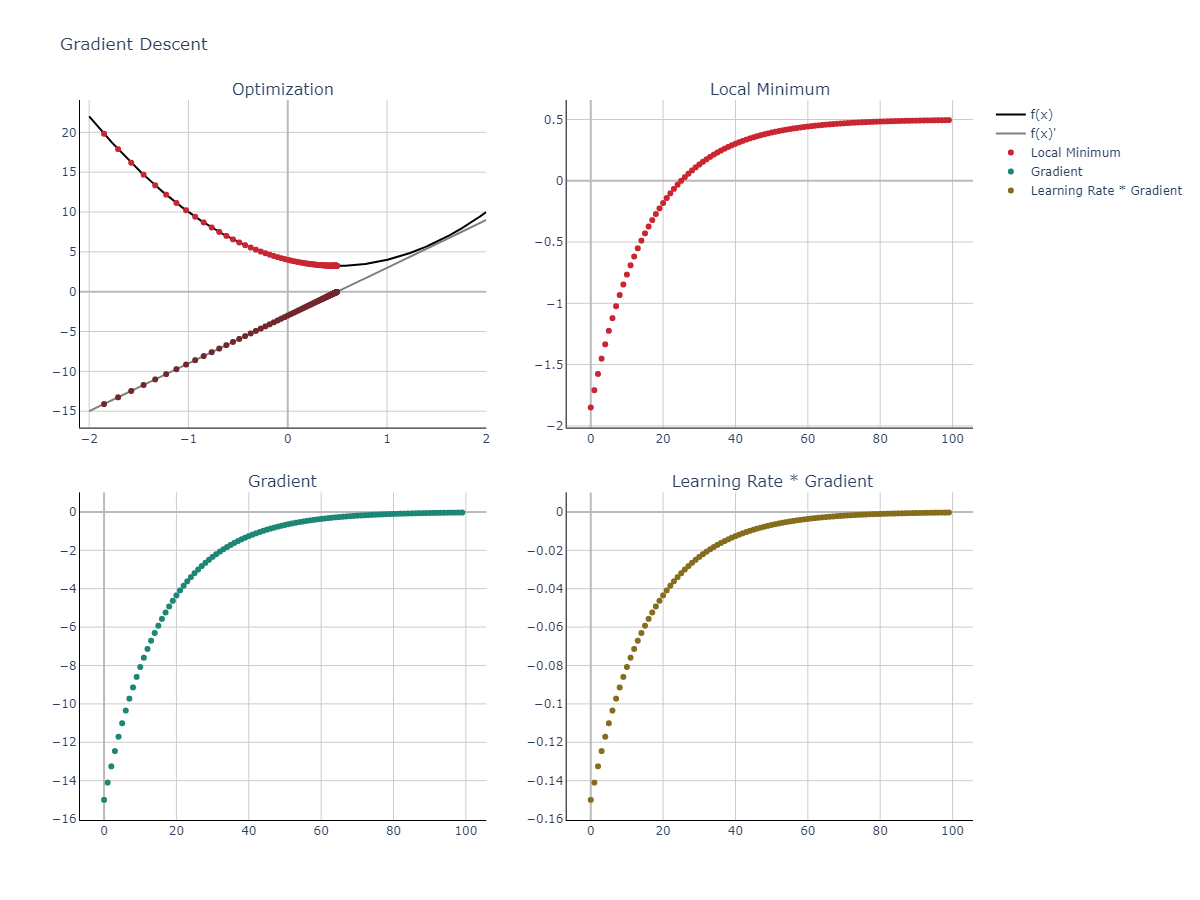

In [86]:
localmin = np.array([-2])
learning_rate = 0.01
training_epochs = 100
df_ = gradient_descent(localmin, learning_rate, training_epochs)

# ==============================================================================

fig = make_subplots(
    subplot_titles=('Optimization', 'Local Minimum', 'Gradient',' Learning Rate * Gradient'),
    rows=2, cols=2, vertical_spacing=0.09, horizontal_spacing=0.09
)

for ff in fig1['data']:
    fig.add_trace(ff, row=1, col=1)

fig.add_trace(go.Scatter(
    x=df_['Local Minimum'], y=fx(df_['Local Minimum']),
    mode='markers', marker=dict(color='#c92631', size=6), showlegend=False
), row=1, col=1)
fig.add_trace(go.Scatter(
    x=df_['Local Minimum'], y=deriv(df_['Local Minimum']),
    mode='markers', marker=dict(color='#71282d', size=6), showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df_.index, y=df_['Local Minimum'],
    mode='markers', marker=dict(color='#c92631', size=6), name='Local Minimum'
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=df_.index, y=df_['Gradient'],
    mode='markers', marker=dict(color='#1d8674', size=6), name='Gradient'
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=df_.index, y=df_['Learning Rate * Gradient'],
    mode='markers', marker=dict(color='#866d1d', size=6), name='Learning Rate * Gradient'
), row=2, col=2)

plotly_main_subplot_layout(fig, width=1200, height=900, title='Gradient Descent')

Now, we can define a function with lots of local minimuns. Therefore, the learning rate has to follow it.

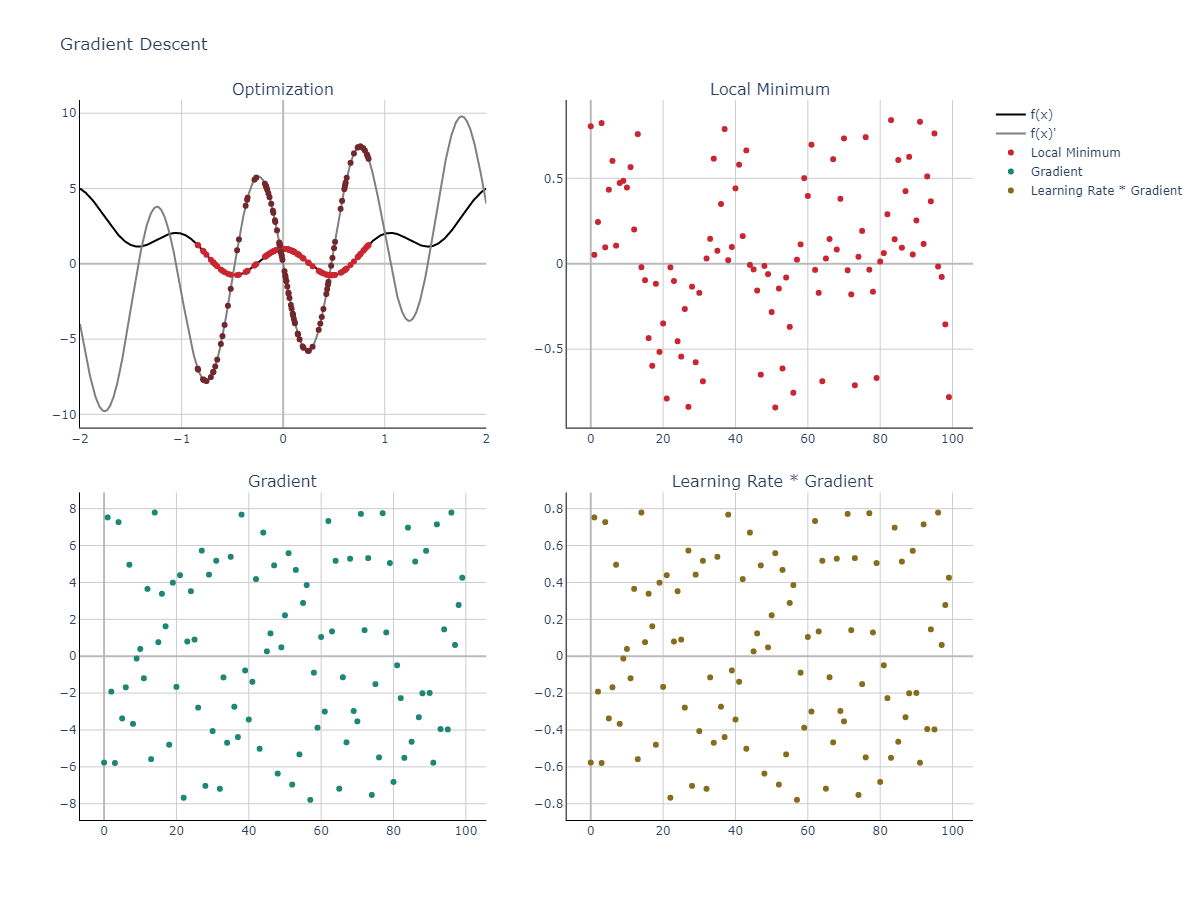

In [123]:
def fx(x):
    return np.cos(2*np.pi*x) + x**2

def deriv(x):
    return -2*np.pi*np.sin(2*np.pi*x) + 2*x

# ==============================================================================

x = np.linspace(-2, 2, 2001)

fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=x, y=fx(x), marker=dict(color='black'), name="f(x)"
))
fig1.add_trace(go.Scatter(
    x=x, y=deriv(x), marker=dict(color='grey'), name="f(x)'"
))

fig1 = plotly_main_layout(fig1, title="f(x) | f(x)'", x='x', y='f(x)', width=600, height=550)

# ==============================================================================

localmin = np.random.choice(x, 1)
learning_rate = 0.1
training_epochs = 100
df_ = gradient_descent(localmin, learning_rate, training_epochs)

# ==============================================================================

fig = make_subplots(
    subplot_titles=('Optimization', 'Local Minimum', 'Gradient',' Learning Rate * Gradient'),
    rows=2, cols=2, vertical_spacing=0.09, horizontal_spacing=0.09
)

for ff in fig1['data']:
    fig.add_trace(ff, row=1, col=1)

fig.add_trace(go.Scatter(
    x=df_['Local Minimum'], y=fx(df_['Local Minimum']),
    mode='markers', marker=dict(color='#c92631', size=6), showlegend=False
), row=1, col=1)
fig.add_trace(go.Scatter(
    x=df_['Local Minimum'], y=deriv(df_['Local Minimum']),
    mode='markers', marker=dict(color='#71282d', size=6), showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=df_.index, y=df_['Local Minimum'],
    mode='markers', marker=dict(color='#c92631', size=6), name='Local Minimum'
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=df_.index, y=df_['Gradient'],
    mode='markers', marker=dict(color='#1d8674', size=6), name='Gradient'
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=df_.index, y=df_['Learning Rate * Gradient'],
    mode='markers', marker=dict(color='#866d1d', size=6), name='Learning Rate * Gradient'
), row=2, col=2)

plotly_main_subplot_layout(fig, width=1200, height=900, title='Gradient Descent')

___
### Gradient Descent 2D

- $\dfrac{\partial f}{\partial x} = f_x(x) = \partial_x f$
- $\nabla = (\partial_xf, \partial_yf, \dots, \partial_zf)$

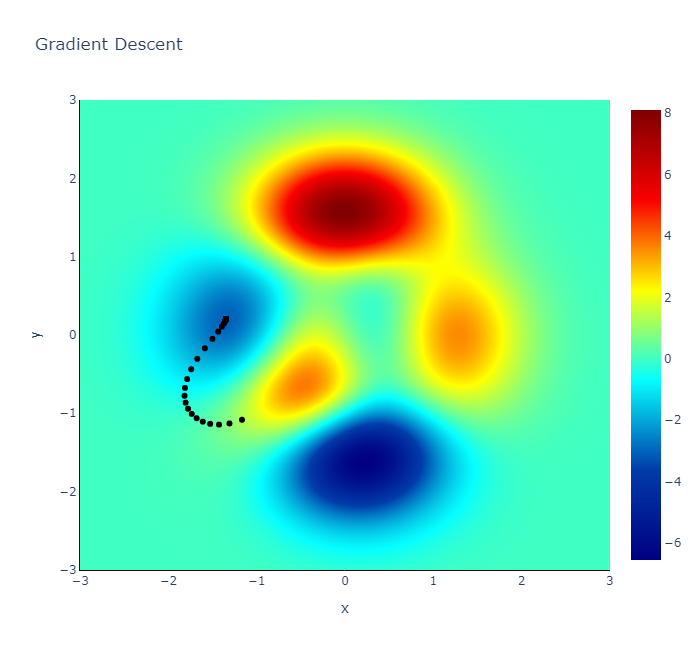

In [181]:
def fx(x, y):
    x, y = np.meshgrid(x, y)

    z = (
        3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * ((x / 5) - x**3 - y**5) * np.exp(-x**2 - y**2)
        - (1 / 3) * np.exp(-(x + 1)**2 - y**2)
    )

    return z

sx, sy = sym.symbols('sx sy')
sZ = (
    3 * (1 - sx)**2 * sym.exp(-(sx**2) - (sy + 1)**2)
    - 10 * ((sx / 5) - sx**3 - sy**5) * sym.exp(-sx**2 - sy**2)
    - 1/3 * sym.exp(-(sx + 1)**2 - sy**2)
)
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

# ==============================================================================

x = np.linspace(-3, 3, 2001)
y = np.linspace(-3, 3, 2001)
z = fx(x, y)

fig1 = go.Figure(data=go.Heatmap(
    z=z, x=x, y=y, colorscale='jet'
))

# ==============================================================================

localmin = np.array([-1, -1])
startpnt = localmin[:]

learning_rate = 0.05
training_epochs = 1000

grad_ = []
localmin_ = []
learning_rate_grad_ = []
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0], localmin[1]).evalf(),
        df_y(localmin[0], localmin[1]).evalf()
    ])
    localmin = localmin - learning_rate*grad
    trajectory[i,:] = localmin

    grad_.append(grad)
    localmin_.append(localmin)
    learning_rate_grad_.append(learning_rate*grad)

df_ = pd.DataFrame({
    'Gradient': grad_,
    'Local Minimum': localmin_,
    'Learning Rate * Gradient': learning_rate_grad_
})

# ==============================================================================

fig = make_subplots(
    subplot_titles=('Optimization', 'Local Minimum', 'Gradient',' Learning Rate * Gradient'),
    rows=2, cols=2, vertical_spacing=0.09, horizontal_spacing=0.09
)

fig.add_traces(ff)

fig.add_trace(go.Scatter(
    x=trajectory[:,0], y=trajectory[:,1],
    mode='markers', marker=dict(color='black', size=6), showlegend=False
))

plotly_main_layout(fig, title='Gradient Descent', x='x', y='y', height=650)

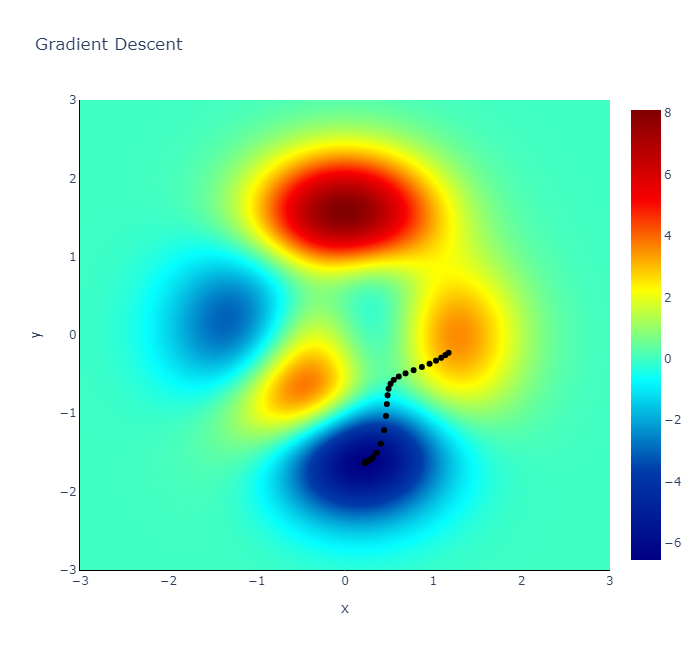

In [179]:
def fx(x, y):
    x, y = np.meshgrid(x, y)

    z = (
        3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * ((x / 5) - x**3 - y**5) * np.exp(-x**2 - y**2)
        - (1 / 3) * np.exp(-(x + 1)**2 - y**2)
    )

    return z

sx, sy = sym.symbols('sx sy')
sZ = (
    3 * (1 - sx)**2 * sym.exp(-(sx**2) - (sy + 1)**2)
    - 10 * ((sx / 5) - sx**3 - sy**5) * sym.exp(-sx**2 - sy**2)
    - 1/3 * sym.exp(-(sx + 1)**2 - sy**2)
)
df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

# ==============================================================================

x = np.linspace(-3, 3, 2001)
y = np.linspace(-3, 3, 2001)
z = fx(x, y)

fig1 = go.Figure(data=go.Heatmap(
    z=z, x=x, y=y, colorscale='jet'
))

# ==============================================================================

localmin = np.array([1.2, -0.2])
startpnt = localmin[:]

learning_rate = 0.02
training_epochs = 1000

grad_ = []
localmin_ = []
learning_rate_grad_ = []
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
    grad = np.array([
        df_x(localmin[0], localmin[1]).evalf(),
        df_y(localmin[0], localmin[1]).evalf()
    ])
    localmin = localmin - learning_rate*grad
    trajectory[i,:] = localmin

    grad_.append(grad)
    localmin_.append(localmin)
    learning_rate_grad_.append(learning_rate*grad)

df_ = pd.DataFrame({
    'Gradient': grad_,
    'Local Minimum': localmin_,
    'Learning Rate * Gradient': learning_rate_grad_
})

# ==============================================================================

fig = make_subplots(
    subplot_titles=('Optimization', 'Local Minimum', 'Gradient',' Learning Rate * Gradient'),
    rows=2, cols=2, vertical_spacing=0.09, horizontal_spacing=0.09
)

fig.add_traces(ff)

fig.add_trace(go.Scatter(
    x=trajectory[:,0], y=trajectory[:,1],
    mode='markers', marker=dict(color='black', size=6), showlegend=False
))

plotly_main_layout(fig, title='Gradient Descent', x='x', y='y', height=650)